<a href="https://colab.research.google.com/github/Sushant-git-001/Cognitive1/blob/main/Assignment_10_cognitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
#q1
paragraph = """
My favorite hobby is book reading. It's a fascinating activity that blends imagination, knowledge, and emotional exploration. Books are constantly evolving, leading to remarkable experiences across genres like fiction, non-fiction, and fantasy. I'm particularly interested in how reading can expand our understanding of complex real-world issues, such as climate change or human behavior. The potential of books is immense, and I believe they shape the way we think and perceive the world in profound ways. Further promotion of reading habits is critical to personal growth and lifelong learning.

"""
# 1. Convert to lowercase and remove punctuation
text = re.sub(r'[^\w\s]', '', paragraph.lower())
# 2. Tokenize into words and sentences
words = word_tokenize(text)
sentences = sent_tokenize(paragraph)
# 3. Compare split() and word_tokenize()
split_words = text.split()
print("Split words:", split_words[:20])
print("Word_tokenize:", words[:20])
print("Difference:", set(split_words) - set(words))
# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# 5. Word frequency distribution (excluding stopwords)
word_freq = FreqDist(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
word_freq.most_common() # Display top 10 most frequent words


Split words: ['my', 'favorite', 'hobby', 'is', 'book', 'reading', 'its', 'a', 'fascinating', 'activity', 'that', 'blends', 'imagination', 'knowledge', 'and', 'emotional', 'exploration', 'books', 'are', 'constantly']
Word_tokenize: ['my', 'favorite', 'hobby', 'is', 'book', 'reading', 'its', 'a', 'fascinating', 'activity', 'that', 'blends', 'imagination', 'knowledge', 'and', 'emotional', 'exploration', 'books', 'are', 'constantly']
Difference: set()

Word Frequency Distribution (excluding stopwords):


[('reading', 3),
 ('books', 2),
 ('favorite', 1),
 ('hobby', 1),
 ('book', 1),
 ('fascinating', 1),
 ('activity', 1),
 ('blends', 1),
 ('imagination', 1),
 ('knowledge', 1),
 ('emotional', 1),
 ('exploration', 1),
 ('constantly', 1),
 ('evolving', 1),
 ('leading', 1),
 ('remarkable', 1),
 ('experiences', 1),
 ('across', 1),
 ('genres', 1),
 ('like', 1),
 ('fiction', 1),
 ('nonfiction', 1),
 ('fantasy', 1),
 ('im', 1),
 ('particularly', 1),
 ('interested', 1),
 ('expand', 1),
 ('understanding', 1),
 ('complex', 1),
 ('realworld', 1),
 ('issues', 1),
 ('climate', 1),
 ('change', 1),
 ('human', 1),
 ('behavior', 1),
 ('potential', 1),
 ('immense', 1),
 ('believe', 1),
 ('shape', 1),
 ('way', 1),
 ('think', 1),
 ('perceive', 1),
 ('world', 1),
 ('profound', 1),
 ('ways', 1),
 ('promotion', 1),
 ('habits', 1),
 ('critical', 1),
 ('personal', 1),
 ('growth', 1),
 ('lifelong', 1),
 ('learning', 1)]

In [3]:
#Q2
import pandas as pd
#1
words = re.findall(r'\b[a-zA-Z]+\b', text)
print(words)
#2
filtered_words = [word for word in words if word not in stop_words]
print(filtered_words)
ps = PorterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_words:
  porter_stem = ps.stem(word)
  lemma = lm.lemmatize(word)
  data.append([word, porter_stem, lemma])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "Lemmatizer Word"])
display(df)

['my', 'favorite', 'hobby', 'is', 'book', 'reading', 'its', 'a', 'fascinating', 'activity', 'that', 'blends', 'imagination', 'knowledge', 'and', 'emotional', 'exploration', 'books', 'are', 'constantly', 'evolving', 'leading', 'to', 'remarkable', 'experiences', 'across', 'genres', 'like', 'fiction', 'nonfiction', 'and', 'fantasy', 'im', 'particularly', 'interested', 'in', 'how', 'reading', 'can', 'expand', 'our', 'understanding', 'of', 'complex', 'realworld', 'issues', 'such', 'as', 'climate', 'change', 'or', 'human', 'behavior', 'the', 'potential', 'of', 'books', 'is', 'immense', 'and', 'i', 'believe', 'they', 'shape', 'the', 'way', 'we', 'think', 'and', 'perceive', 'the', 'world', 'in', 'profound', 'ways', 'further', 'promotion', 'of', 'reading', 'habits', 'is', 'critical', 'to', 'personal', 'growth', 'and', 'lifelong', 'learning']
['favorite', 'hobby', 'book', 'reading', 'fascinating', 'activity', 'blends', 'imagination', 'knowledge', 'emotional', 'exploration', 'books', 'constantly'

,Word,PorterStemmed Word,Lemmatizer Word
0,favorite,favorit,favorite
1,hobby,hobbi,hobby
2,book,book,book
3,reading,read,reading
4,fascinating,fascin,fascinating
5,activity,activ,activity
6,blends,blend,blend
7,imagination,imagin,imagination
8,knowledge,knowledg,knowledge
9,emotional,emot,emotional


In [4]:

#Q3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#1
texts = ["Local Community Rallies Together to Clean Up Park After Severe Storm", "Product: Wireless Noise-Canceling Headphones", "Just finished reading 'The Midnight Library' by Matt Haig!"]
cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print("---------------------------------------------")
print(X.toarray())
#2
print("---------------------------------------------")
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print("---------------------------------------------")
print(tfidf_matrix.toarray())
print("---------------------------------------------")
#3
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]  # Sort indices in descending order
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print("---------------------------------------------")
    print(f"Top 3 keywords: {top_keywords}\n")

['after' 'by' 'canceling' 'clean' 'community' 'finished' 'haig'
 'headphones' 'just' 'library' 'local' 'matt' 'midnight' 'noise' 'park'
 'product' 'rallies' 'reading' 'severe' 'storm' 'the' 'to' 'together' 'up'
 'wireless']
---------------------------------------------
[[1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]]
---------------------------------------------
['after' 'by' 'canceling' 'clean' 'community' 'finished' 'haig'
 'headphones' 'just' 'library' 'local' 'matt' 'midnight' 'noise' 'park'
 'product' 'rallies' 'reading' 'severe' 'storm' 'the' 'to' 'together' 'up'
 'wireless']
---------------------------------------------
[[0.30151134 0.         0.         0.30151134 0.30151134 0.
  0.         0.         0.         0.         0.30151134 0.
  0.         0.         0.30151134 0.         0.30151134 0.
  0.30151134 0.30151134 0.         0.30151134 0.30151134 0.30151134
  0.  

In [5]:
#Q4
from sklearn.metrics.pairwise import cosine_similarity
A = """
Artificial Intelligence (AI) refers to the simulation of human intelligence in machines designed to think and learn like humans. AI technologies, such as machine learning and natural language processing, enable systems to analyze vast amounts of data, recognize patterns, and make decisions. From virtual assistants like Siri to advanced algorithms in healthcare, AI is revolutionizing industries by enhancing efficiency and enabling personalized experiences. Its potential continues to grow, shaping the future of work and daily life.
"""
B = """
Blockchain technology is a decentralized digital ledger that securely records transactions across multiple computers. Each block in the chain contains a set of transactions, and once added, it cannot be altered, ensuring transparency and security. This technology underpins cryptocurrencies like Bitcoin but has applications beyond finance, including supply chain management, healthcare, and voting systems. By providing a tamper-proof record of transactions, blockchain fosters trust and accountability in various sectors.
"""
# 1. Preprocess and Tokenize
texts1 = re.sub(r'[^\w\s]', '', A.lower())
print(texts1)
print("------------------------------------------------")
texts2 = re.sub(r'[^\w\s]', '', B.lower())
print(texts2)
print("------------------------------------------------")
text1 = set(texts1.split())
print(text1)
print("------------------------------------------------")
text2 = set(texts2.split())
print(text2)
print("------------------------------------------------")
# 3. Intersection
jaccard = len(text1.intersection(text2)) / len(text1.union(text2))
print("Jaccard Similarity:", jaccard)
print("------------------------------------------------")
tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform([texts1, texts2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])


artificial intelligence ai refers to the simulation of human intelligence in machines designed to think and learn like humans ai technologies such as machine learning and natural language processing enable systems to analyze vast amounts of data recognize patterns and make decisions from virtual assistants like siri to advanced algorithms in healthcare ai is revolutionizing industries by enhancing efficiency and enabling personalized experiences its potential continues to grow shaping the future of work and daily life

------------------------------------------------

blockchain technology is a decentralized digital ledger that securely records transactions across multiple computers each block in the chain contains a set of transactions and once added it cannot be altered ensuring transparency and security this technology underpins cryptocurrencies like bitcoin but has applications beyond finance including supply chain management healthcare and voting systems by providing a tamperproo

Review: The product is excellent!
Polarity: 1.0
Subjectivity: 1.0
Sentiment: Positive
------------------------------------------------
Review: Bad Service
Polarity: -0.6999999999999998
Subjectivity: 0.6666666666666666
Sentiment: Negative
------------------------------------------------
Review: Not good food
Polarity: -0.35
Subjectivity: 0.6000000000000001
Sentiment: Negative
------------------------------------------------
Review: Great service and quality.
Polarity: 0.8
Subjectivity: 0.75
Sentiment: Positive
------------------------------------------------
Review: Torn bedsheets and foul smell
Polarity: 0.0
Subjectivity: 0.0
Sentiment: Neutral
------------------------------------------------
Review: Highly recommended.
Polarity: 0.16
Subjectivity: 0.5399999999999999
Sentiment: Positive
------------------------------------------------


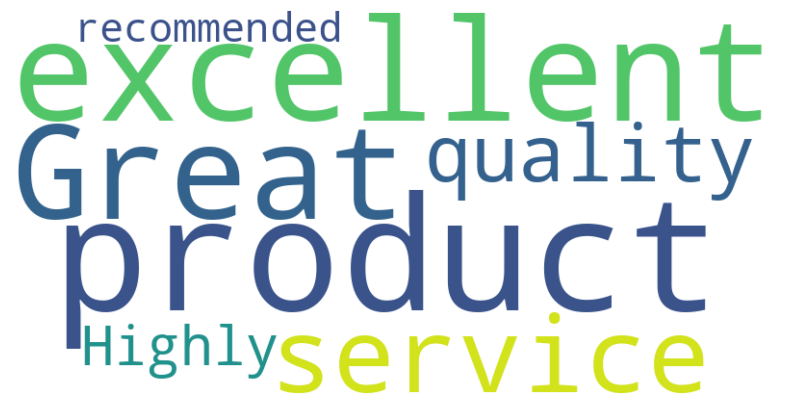

In [6]:
#Q5
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#1
reviews = ["The product is excellent!","Bad Service", "Not good food" ,"Great service and quality.","Torn bedsheets and foul smell" ,"Highly recommended."]
positive_reviews = []
for(i,review) in enumerate(reviews):
  blob = TextBlob(review)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Review: {review}")
  print(f"Polarity: {polarity}")
  print(f"Subjectivity: {subjectivity}")
  if polarity > 0.1:
      sentiment = "Positive"
      positive_reviews.append(review)
  elif polarity < -0.1:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  print(f"Sentiment: {sentiment}")
  print("------------------------------------------------")

#3
all_positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [7]:
#Q6
!pip install keras tensorflow